# e.g. 2: Compare monthly SST climatology from monthly inputs from 2 forecast runs.

In [24]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

BEGIN
hostname= oa-32-cdc
this is vm32
Current Working Directory= /OSM/CBR/OA_DCFP/work/col414/cafepp
cafe_monthly_files_1st= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r2i1p1f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p1f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r3i1p1f1_gn_201601-202012.nc']]
cafe_monthly_files_2nd= [['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r2i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r2i1p4f1_gn_201601-202012.nc'], ['/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6/CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r3i1p4f1/Omon/tos/gn/v20171025/tos_Omon_historical_CAFE-1-0_r3i1p4f1_gn_201601-202012.nc']]
n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: Produce annual output r

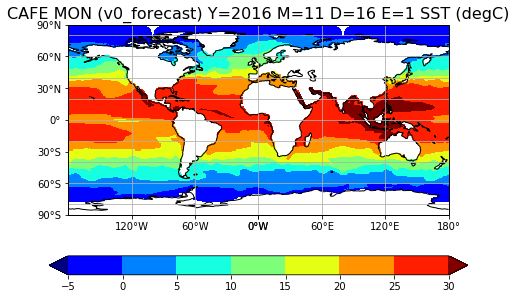

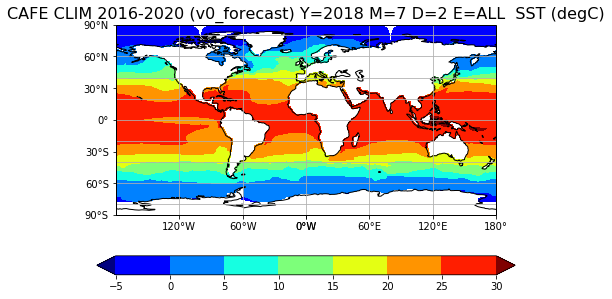

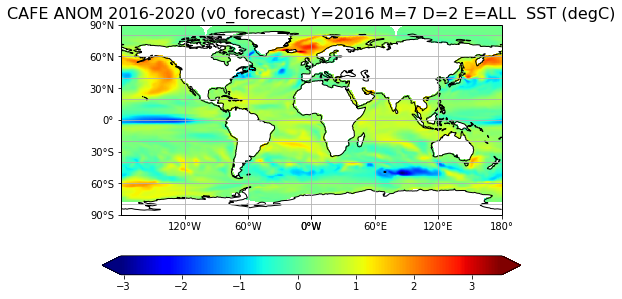

n_data_funcs.init: ensembles in this example.
calculate_filedatetime_info: case 3: ensembles but only one file for each ensemble.
Diag= False
monthly_clim_anom: Produce annual output rather than monthly.
monthly_clim_anom: All years have 12 months.


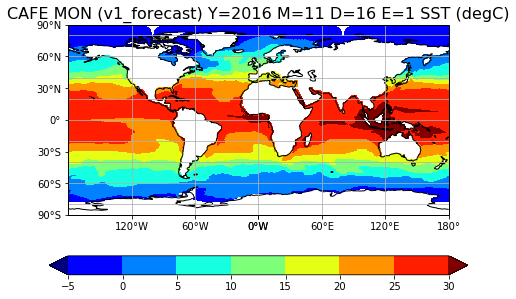

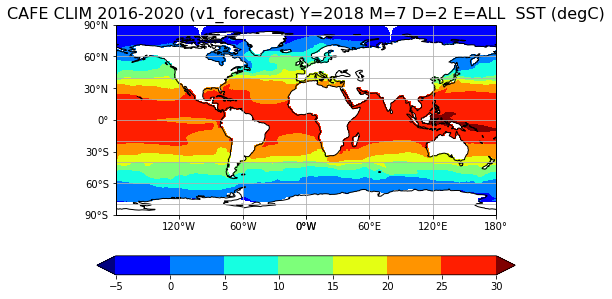

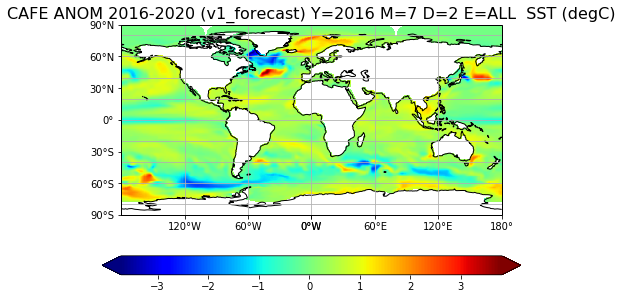

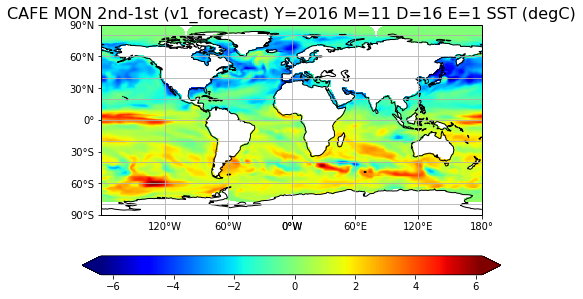

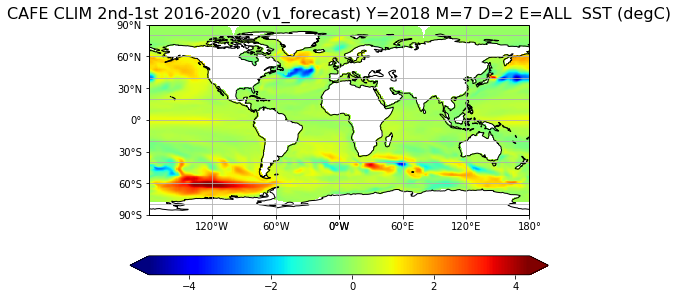

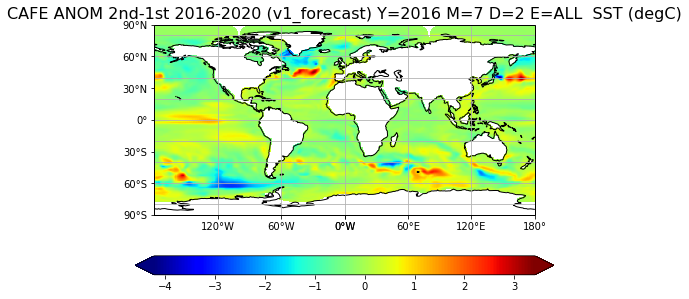

END


In [25]:
print('BEGIN')

import socket
import re
import os

hostname=socket.gethostname()

print('hostname=',hostname)

if(re.match('raijin',hostname)):
  print('this is rajin')
  rundir='/short/v14/mac599/cafepp/rundir'
  topdir=''
elif(re.match('oa-32-cdc',hostname)):
  print('this is vm32')
  rundir='/OSM/CBR/OA_DCFP/work/col414/cafepp'
  topdir='/OSM/CBR/OA_DCFP/data/CAFEPP/CMIP6'

os.chdir(rundir)

os.chdir('/OSM/CBR/OA_DCFP/work/col414/cafepp')

print('Current Working Directory=',os.getcwd())

SWITCH_OFF=True #temporary for easy skipping of this section.
SWITCH_OFF=False

if(not SWITCH_OFF):
  
  %matplotlib inline

  __file__='jupyter_notebook' #this can be deleted when written to a python script and loaded as module.

  import sys
  import inspect
  from decadal_diag import n_data_funcs  
  import cartopy.crs as ccrs
  from cartopy.util import add_cyclic_point
  import numpy as np
  
  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number
  
  model='CAFE'
    
  cafe_experiment_titles = {1:'v0_forecast', 4:'v1_forecast', 3:'v2_forecast', 9:'v1', 5:'v2', 6:'v3', 7:'aug17p'}
  
  ivar_str_cafe='tos';offset=0.0;scale=1.0;long_name='Sea Surface Temperature';short_name='SST';units='degC';table='Omon'

  pval_1st=1 #v1_forecast
  cafe_monthly_files_1st,cafe_monthly_files_flat_1st=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_monthly_files_1st=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_1st)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_1st=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_1st)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_1st:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_1st.append(idir+'/'+file)
    cafe_monthly_files_1st.append(cafe_inner_monthly_files_1st)

  print('cafe_monthly_files_1st=',cafe_monthly_files_1st)

  pval_2nd=4 #v0_forecast
  cafe_monthly_files_2nd,cafe_monthly_files_flat_2nd=[],[]
  for ensemble in range(2,3+1):
    cafe_inner_monthly_files_2nd=[]
    idir=topdir+'/'+'CMIP6/CMIP/CSIRO/CAFE-1-0/historical/r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1/'+table+'/'+ivar_str_cafe+'/gn/v20171025'
    monthly_ifils_2nd=[ivar_str_cafe+'_'+table+'_historical_CAFE-1-0_r'+str(ensemble)+'i1p'+str(pval_2nd)+'f1_gn_201601-202012.nc'] #1 file
    for file in monthly_ifils_2nd:
      if(not os.path.exists(idir+'/'+file)):
        raise SystemExit(idir+'/'+file+' doesnt exist:'+__file__+' line number: '+str(inspect.stack()[0][2]))
      else:
        cafe_inner_monthly_files_2nd.append(idir+'/'+file)
    cafe_monthly_files_2nd.append(cafe_inner_monthly_files_2nd)

  print('cafe_monthly_files_2nd=',cafe_monthly_files_2nd)
  
  cbeg=2016
  cend=2020
  abeg=2016
  aend=2020

  from decadal_diag import \
    fractional_year_from_num2date, \
    generate_daily_month_indices, \
    shade_2d_latlon, \
    get_timestamp_number, \
    shade_2d_curvilinear, \
    shade_2d_simple

  grid_label='cafep'
  cafe_calendar='julian'
  
#===============================================================================

  cafe_monthly_files_1st=n_data_funcs(input_files=cafe_monthly_files_1st,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_1st.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_1st.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_sst_from_monthly_1st=cafe_monthly_files_1st.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_sst_annual_climatology_from_monthly_1st,cafe_sst_annual_anomaly_from_monthly_1st=cafe_monthly_files_1st.monthly_clim_anom( \
    Diag=False, input=cafe_sst_from_monthly_1st, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  step=5;clevs=sorted(list(set(np.arange(-5, 30+step, step).tolist())))

  shade_2d_curvilinear(cafe_sst_from_monthly_1st[month_to_plot,ensemble_to_plot,], \
    xyvals=(cafe_monthly_files_1st.lon2d[:],cafe_monthly_files_1st.lat2d[:]), \
    title=model+' MON ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
    
  shade_2d_curvilinear(np.average(cafe_sst_annual_climatology_from_monthly_1st[:],axis=0), \
    xyvals=(cafe_monthly_files_1st.lon2d[:],cafe_monthly_files_1st.lat2d[:]), \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_climatology.day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
  
  shade_2d_curvilinear(np.average(cafe_sst_annual_anomaly_from_monthly_1st[year_to_plot,:],axis=0), \
    xyvals=(cafe_monthly_files_1st.lon2d[:],cafe_monthly_files_1st.lat2d[:]), \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_1st]+')'+ \
    ' Y='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_1st.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=None)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))

#===============================================================================

  cafe_monthly_files_2nd=n_data_funcs(input_files=cafe_monthly_files_2nd,input_var_name=ivar_str_cafe)
  
  cafe_monthly_files_2nd.calculate_filedatetime_info(Diag=False,calendar=cafe_calendar)
  
  cafe_monthly_files_2nd.get_latlon_info(Diag=False,lat='latitude',lon='longitude')
  
  cafe_sst_from_monthly_2nd=cafe_monthly_files_2nd.calculate_quantity('dummy',Diag=False,quantity='latlon_region,0,299,0,359')
  
  cafe_sst_annual_climatology_from_monthly_2nd,cafe_sst_annual_anomaly_from_monthly_2nd=cafe_monthly_files_2nd.monthly_clim_anom( \
    Diag=False, input=cafe_sst_from_monthly_2nd, AnnOut=True, ZeroClim=False, \
    cbeg=cbeg, cend=cend, abeg=abeg, aend=aend)
  
  #raise SystemExit('STOP!:'+__file__+' line number: '+str(inspect.stack()[0][2]))
  
  month_to_plot=10 #base 0
  year_to_plot=0 #base 0
  ensemble_to_plot=1 #base 0
  
  clevs=None
  step=5;clevs=sorted(list(set(np.arange(-5, 30+step, step).tolist())))

  shade_2d_curvilinear(cafe_sst_from_monthly_2nd[month_to_plot,ensemble_to_plot,], \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' MON ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
    
  shade_2d_curvilinear(np.average(cafe_sst_annual_climatology_from_monthly_2nd[:],axis=0), \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' CLIM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
  
  shade_2d_curvilinear(np.average(cafe_sst_annual_anomaly_from_monthly_2nd[year_to_plot,:],axis=0), \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' ANOM '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=None)
  
#===============================================================================

  clevs=None
  
  shade_2d_curvilinear(cafe_sst_from_monthly_2nd[month_to_plot,ensemble_to_plot,]-cafe_sst_from_monthly_1st[month_to_plot,ensemble_to_plot,], \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' MON 2nd-1st ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_tfreq[0][month_to_plot].day)+ \
    ' E='+str(ensemble_to_plot)+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
    
  shade_2d_curvilinear(np.average(cafe_sst_annual_climatology_from_monthly_2nd[:],axis=0)-np.average(cafe_sst_annual_climatology_from_monthly_1st[:],axis=0), \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' CLIM 2nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_climatology.day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=clevs)
  
  shade_2d_curvilinear(np.average(cafe_sst_annual_anomaly_from_monthly_2nd[year_to_plot,:],axis=0)-np.average(cafe_sst_annual_anomaly_from_monthly_1st[year_to_plot,:],axis=0), \
    xyvals=(cafe_monthly_files_2nd.lon2d[:],cafe_monthly_files_2nd.lat2d[:]), \
    title=model+' ANOM 2nd-1st '+str(cbeg)+'-'+str(cend)+' ('+cafe_experiment_titles[pval_2nd]+')'+ \
    ' Y='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].year)+ \
    ' M='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].month)+ \
    ' D='+str(cafe_monthly_files_2nd.date_time_stamp_anomaly[year_to_plot].day)+' E=ALL'+' '+' '+short_name, \
    units=units, extend='both', xysize=(10,5), cmap='jet', clevs=None)
  
#===============================================================================

print('END')